<a href="https://colab.research.google.com/github/CateS0908/Calidad-del-vino/blob/master/Version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis de marketing digital

Este conjunto de datos ofrece una visión en profundidad de las interacciones con los clientes y el rendimiento de las campañas en el ámbito del marketing digital. Incluye métricas clave e información demográfica que son cruciales para analizar la eficacia del marketing y la interacción con los clientes.

Inclye datos de:

Identificación del cliente

Edad

Género

Ingreso

Canal de campaña

Tipo de campaña

Gasto publicitario

Tasa de clics (CTR)

Tasa de conversión

Visita al sitio web

Páginas por visita

Tiempo en el sitio web

Cantidad de compartido en redes sociales

Email abierto

Clics en email

Compras anteriores

Puntos de fidelidad

Publicidad en plataforma

Herramienta de publicidad

Conversion

In [31]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [32]:
url = 'https://drive.google.com/uc?id=1eXtrSBO-liURziQ5AjMip1rXnd5nQt2X&export=download'
df = pd.read_csv(url)
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [33]:
df.tail()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1
7999,15999,31,Female,93002,Email,Awareness,7743.627070,0.185670,0.057228,15,6.964739,12.763660,2,18,9,9,341,IsConfid,ToolConfid,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [35]:
df.describe().round(3)

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000
mean,11999.500,43.626,84664.197,5000.945,0.155,0.104,24.752,5.549,7.728,49.800,9.477,4.467,4.486,2490.268,0.876
std,2309.545,14.903,37580.388,2838.038,0.084,0.055,14.312,2.607,4.228,28.901,5.711,2.857,2.888,1429.527,0.329
min,8000.000,18.000,20014.000,100.055,0.010,0.010,0.000,1.000,0.502,0.000,0.000,0.000,0.000,0.000,0.000
25%,9999.750,31.000,51744.500,2523.221,0.083,0.056,13.000,3.302,4.068,25.000,5.000,2.000,2.000,1254.750,1.000
50%,11999.500,43.000,84926.500,5013.440,0.155,0.104,25.000,5.534,7.683,50.000,9.000,4.000,4.000,2497.000,1.000
75%,13999.250,56.000,116815.750,7407.989,0.228,0.152,37.000,7.836,11.481,75.000,14.000,7.000,7.000,3702.250,1.000
max,15999.000,69.000,149986.000,9997.915,0.300,0.200,49.000,9.999,14.995,99.000,19.000,9.000,9.000,4999.000,1.000


In [36]:
df.duplicated().sum()

0

In [37]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0


Verificación de las variables catégoricas

In [38]:
for columna in df.columns:
  print(f'Valores únicos en la columna {columna}:\n{df[columna].unique()}\n')

Valores únicos en la columna CustomerID:
[ 8000  8001  8002 ... 15997 15998 15999]

Valores únicos en la columna Age:
[56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]

Valores únicos en la columna Gender:
['Female' 'Male']

Valores únicos en la columna Income:
[136912  41760  88456 ...  24849 125471 107862]

Valores únicos en la columna CampaignChannel:
['Social Media' 'Email' 'PPC' 'Referral' 'SEO']

Valores únicos en la columna CampaignType:
['Awareness' 'Retention' 'Conversion' 'Consideration']

Valores únicos en la columna AdSpend:
[6497.870068 3898.668606 1546.429596 ... 4609.534635 9476.106354
 7743.62707 ]

Valores únicos en la columna ClickThroughRate:
[0.04391851 0.15572507 0.27749037 ... 0.05652592 0.02396129 0.1856701 ]

Valores únicos en la columna ConversionRate:
[0.08803141 0.18272468 0.07642272 ... 0.13382612 0.13838618 0.05722808]

Valores únicos en la columna 

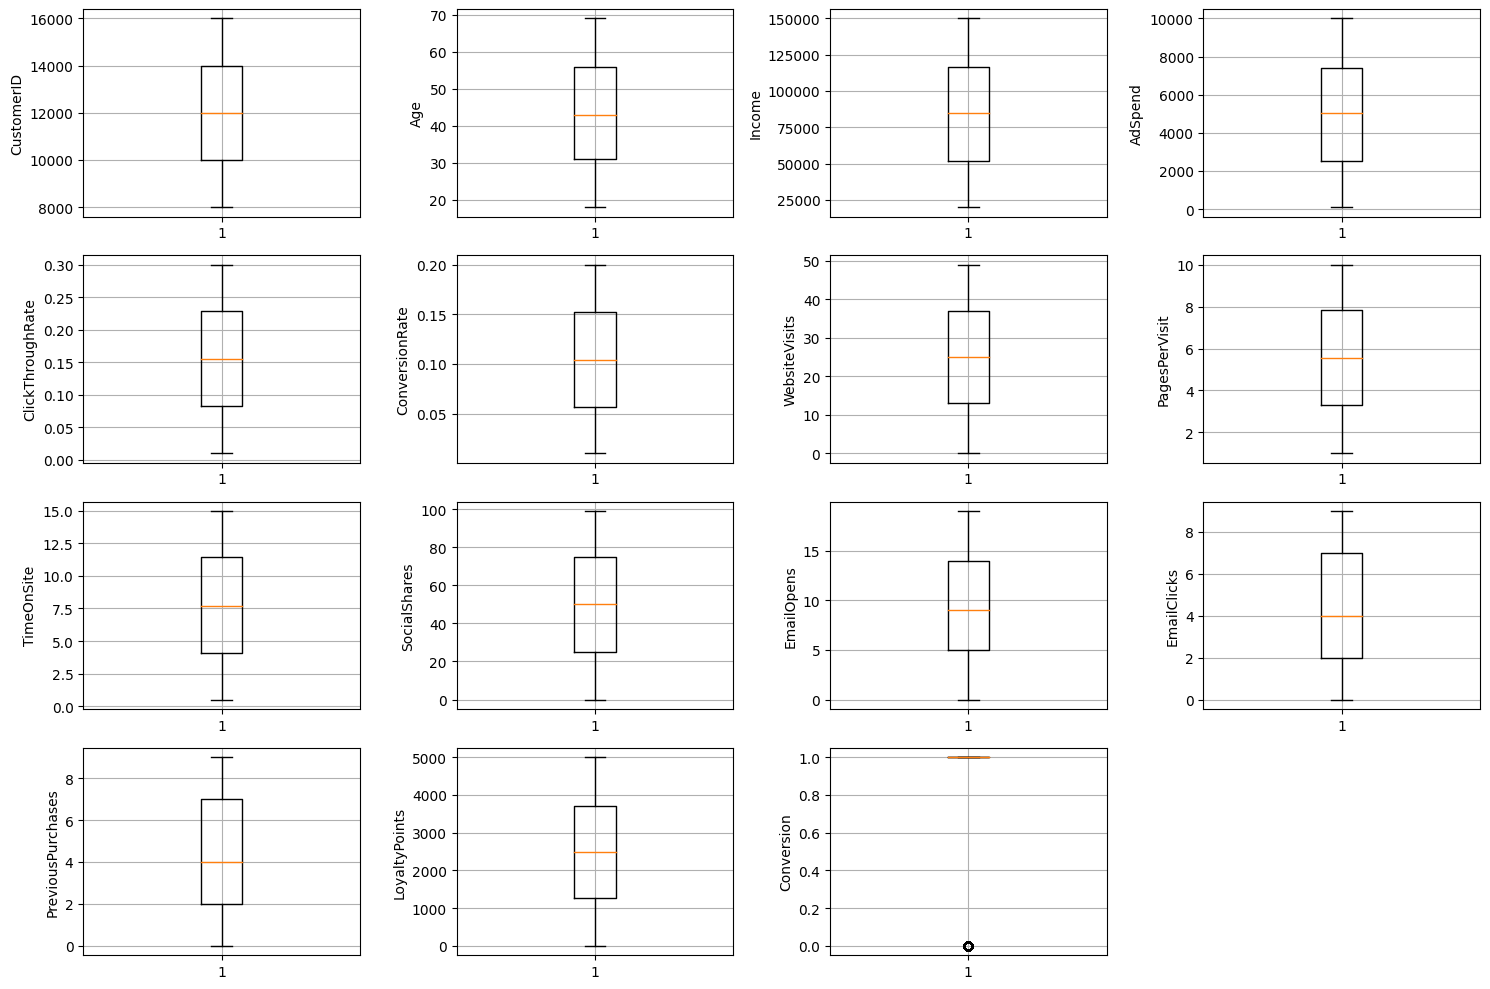

In [39]:
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(4,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

Visualización del comportamiento de los datos

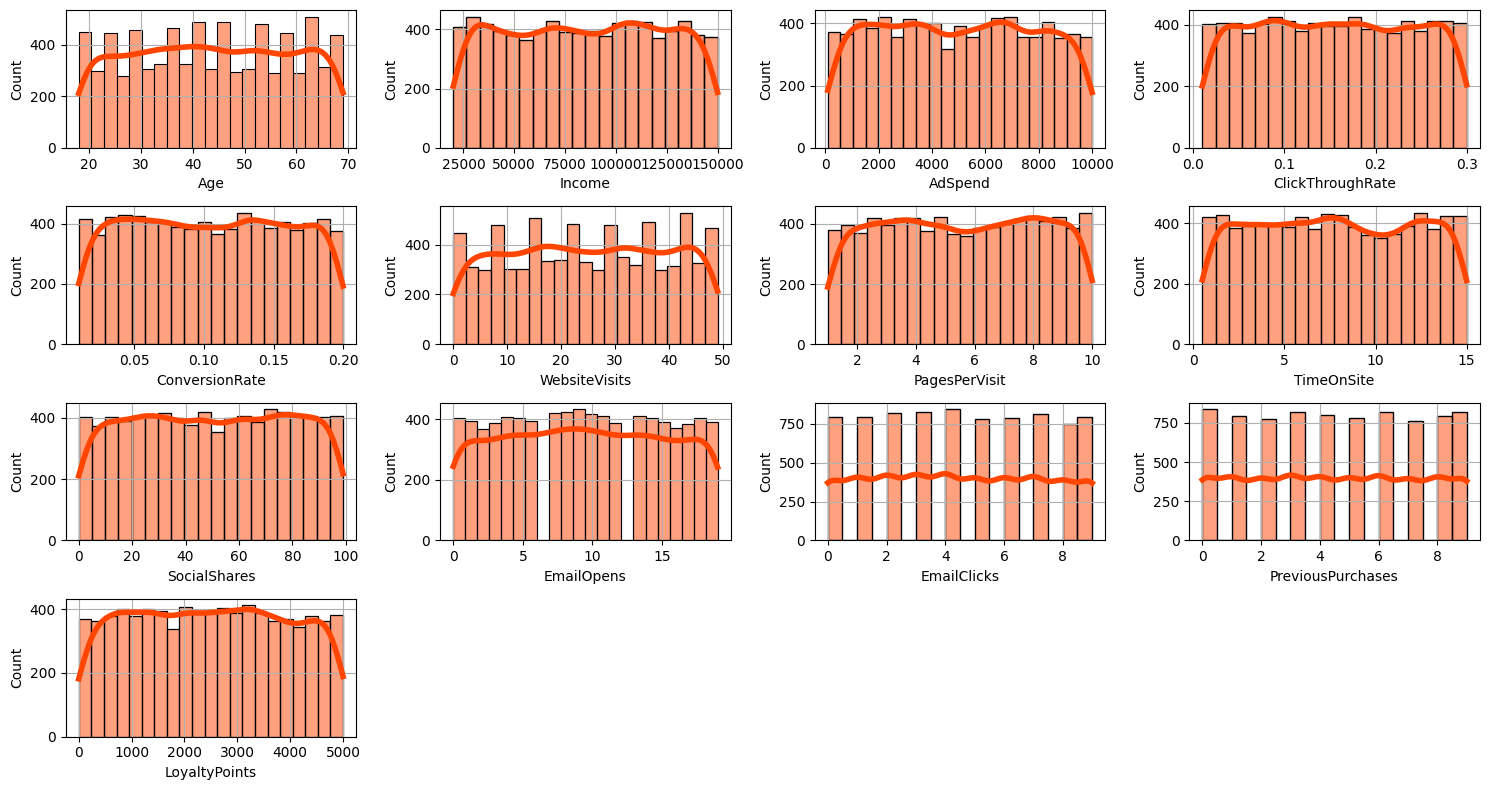

In [40]:
columnas = df.select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop(['Conversion', 'CustomerID'])

n = 1
plt.figure(figsize=(15,8), dpi=100)
for columna in columnas:
  plt.subplot(4,4,n)
  n = n+1
  sns.histplot(df, x = columna, stat = 'count', kde=True, color= 'orangered', line_kws = {'linewidth': 4})
  plt.grid(True)
  plt.tight_layout()

'Age': se evidencia una interacción con las campañas publicitarias de manera uniforme en el rango de edad desde 20 hasta 70 años.

'Income': comportamiento multimodal, con diversos ingresos lo que indica que hay clientes con diferentes capacidades económicas.

'AdSpend': comportamiento multimodal, se aprecia inversiones desde los 500 aproximadamente hasta los 10000 con fuerte crecimiento al pago por publicidad.

'ClickThorughRate': la medición de la proporción de la frecuencia con la que las personas ven un anuncio es grande hay mucho movimiento hacia la página.

'Conversion Rate': refleja el éxito de una campaña, se puede visualizar un comportamiento simétrico con una creciente respuesta por parte de los clientes.

'Websites Visits' medida del engagement e interés con una tendencia multimodal.

'PagesprVisit': comportamiento bimodal.

'TimeOnSite': comportamiento multimodal.

'SocialShares': comportamiento bimodal.

Para las siguientes columnas se puede pareciar un comportamiento multimodal.

In [41]:
pip install imbalanced-learn

In [42]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
#Definir las columnas numéricas y categóricas.

numeric_features = ['CustomerID','Age','Income', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'AdSpend']

categorical_features = ['Gender','CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

# creación de un Pipeline para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')), # relleno de faltantes si es que los hay
    ('scaler', StandardScaler()) # Escalado de las categorías numéricas
])

In [44]:
# Creación de un Pipeline para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('nominal', OneHotEncoder(handle_unknown='ignore', sparse_output= False))  # One-hot encoding de las categóricas
])

In [45]:
# Usar ColumnTransformer para aplicar las transformaciones a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('numerica', numeric_transformer, numeric_features),
        ('categorica', categorical_transformer, categorical_features)
    ])

In [46]:
# Dividir el target y eliminar columnas irrelevantes
X = df.drop(['Conversion'], axis=1)
y = df['Conversion']

In [47]:
# Preparación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31, stratify=y)

In [48]:
# Aplicar el sobre-muestreo a los datos de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_b, y_train_b = ros.fit_resample(X_train, y_train)

In [49]:
X_train_b = pd.DataFrame(X_train_b, columns=X.columns)

In [50]:
# Aplicar el preprocesador a los conjuntos de entrenamiento y prueba
X_train_b = preprocessor.fit_transform(X_train_b)
X_test_preprocessed = preprocessor.transform(X_test)

In [27]:
# Verificar la forma de los datos transformados
print(X_train_b.shape, X_test_preprocessed.shape)

(5600, 27) (2400, 27)


In [52]:
target_distribution = y_train_b.value_counts()

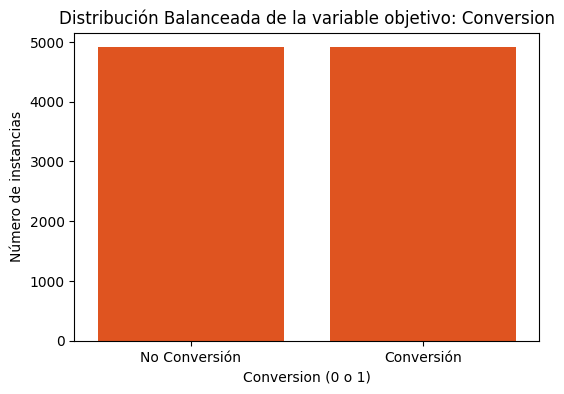

In [54]:
# Gráfico de Barras
plt.figure(figsize=(6,4))
sns.barplot(x=target_distribution.index, y=target_distribution.values,color='orangered')
plt.title('Distribución Balanceada de la variable objetivo: Conversion')
plt.xlabel('Conversion (0 o 1)')
plt.ylabel('Número de instancias')
plt.xticks(ticks=[0, 1], labels=['No Conversión', 'Conversión'])  # Personalizar etiquetas
plt.show()

# Árbol de decisión

Empleo de GridSearch para hallar los mejores parámetros

# XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Modelo de K-Means